In [11]:
!pip install kaggle

In [12]:
!mkdir .kaggle

In [13]:
import json
token = {"username":"vineethsheri","key":"aa2c12d6139cf02dbe92f9c8182ed621"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [16]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [17]:
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


In [22]:
!kaggle datasets download -d msambare/fer2013 -p /content


 83% 50.0M/60.3M [00:00<00:00, 42.1MB/s]
100% 60.3M/60.3M [00:00<00:00, 82.6MB/s]


In [23]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
import pandas as pd
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_dir = "/content/train"
test_dir = "/content/test"

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split = 0.2,rotation_range=5,zoom_range=0.3,horizontal_flip=True,fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [24]:
training_set = train_datagen.flow_from_directory(train_dir,batch_size=128,class_mode='categorical',target_size=(48,48),shuffle=True)

test_set = test_datagen.flow_from_directory(test_dir,batch_size=128,target_size=(48,48),shuffle=True,class_mode='categorical')

valid_dataset = valid_datagen.flow_from_directory(train_dir,target_size = (48,48),class_mode = 'categorical',subset = 'validation',batch_size = 128)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [3]:

def define_model():
  model = Sequential()
  model.add(Conv2D(64,(3, 3), kernel_regularizer=l2(0.01), input_shape=(48, 48, 3), activation='relu'))
  model.add(Conv2D(64,(3, 3),activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
  model.add(Dropout(0.5))
      
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same',))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
      
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
      
  model.add(Conv2D(512, (3, 3), activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(512, (3, 3), activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(512, (3, 3), activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
      
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(128,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(7,activation='softmax'))
  return model

In [4]:
model = define_model()
learning_rate = 0.001
adam_optimizer = optimizers.Adam(lr = learning_rate)
epochs = 100
model.compile(optimizer = adam_optimizer, metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 46, 46, 64)        1792      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_28 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_29 (Batc (None, 23, 23, 128)      

In [5]:
learningRate_reducer = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.8)
earlyStopping = EarlyStopping(monitor='val_acc', patience=6,)
checkpointer = ModelCheckpoint('/content/gdrive/MyDrive/Project/Dataset/weights1.hd5', monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
model.fit(training_set,epochs = epochs,validation_data=valid_dataset,shuffle = True,
          callbacks=[learningRate_reducer, checkpointer, earlyStopping]
          )

Epoch 1/100
225/225 [==============================] - 63s 256ms/step - loss: 2.2290 - accuracy: 0.1767 - val_loss: 1.8965 - val_accuracy: 0.2513

Epoch 00001: val_loss improved from inf to 1.89649, saving model to /content/gdrive/MyDrive/Project/Dataset/weights1.hd5
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Project/Dataset/weights1.hd5/assets
Epoch 2/100
225/225 [==============================] - 55s 245ms/step - loss: 1.8686 - accuracy: 0.2403 - val_loss: 1.8270 - val_accuracy: 0.2571

Epoch 00002: val_loss improved from 1.89649 to 1.82697, saving model to /content/gdrive/MyDrive/Project/Dataset/weights1.hd5
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Project/Dataset/weights1.hd5/assets
Epoch 3/100
225/225 [==============================] - 56s 246ms/step - loss: 1.8218 - accuracy: 0.2571 - val_loss: 1.8648 - val_accuracy: 0.2653

Epoch 00003: val_loss did not improve from 1.82697
Epoch 4/100
225/225 [==============================] - 55s 244ms/step - 

In [8]:
modelJson = model.to_json()
with open("/content/gdrive/MyDrive/Project/Dataset/FERmodel1.json", "w") as json_file:
    json_file.write(modelJson)
# serialize weights to HDF5
model.save_weights("/content/gdrive/MyDrive/Project/Dataset/FERmodel1.h5")
print("Saved model to the drive ")

Saved model to the drive 


In [26]:
from keras.models import model_from_json
model1 = define_model()
model1.load_weights("/content/gdrive/MyDrive/Project/Dataset/FERmodel1.h5")
print("Loaded the model from drive")

Loaded the model from drive


In [27]:
predictedValues= np.argmax(model.predict(test_set), axis=1)
print ("Accuracy score = ", accuracy_score(test_set.classes, predictedValues))

Accuracy score =  0.1156310950125383


In [ ]:
model1.compile(optimizer = adam_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model1.fit(training_set,epochs = 1,validation_data=test_set)

225/225 [==============================] - 54s 230ms/step - loss: 0.5112 - accuracy: 0.8212 - val_loss: 1.2194 - val_accuracy: 0.6702


In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 5.2MB/s 


In [ ]:
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
from google.colab.patches import cv2_imshow

def get_emotion(imgLocation):
    MTCNNDetector = MTCNN()
    img = cv2.imread(imgLocation)
    gray = img
    emotionLabels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

    faces = MTCNNDetector.detect_faces(img)
    for f in faces:
        x, y, w, h = f['box']
        x1, y1 = x + w, y + h
        cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)
        # make a prediction on the ROI, then lookup the class
            preds = model.predict(roi)[0]
            label=emotionLabels[preds.argmax()]
            label_position = (x,y)
            cv2.putText(img,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        else:
            cv2.putText(img,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    cv2_imshow(img)

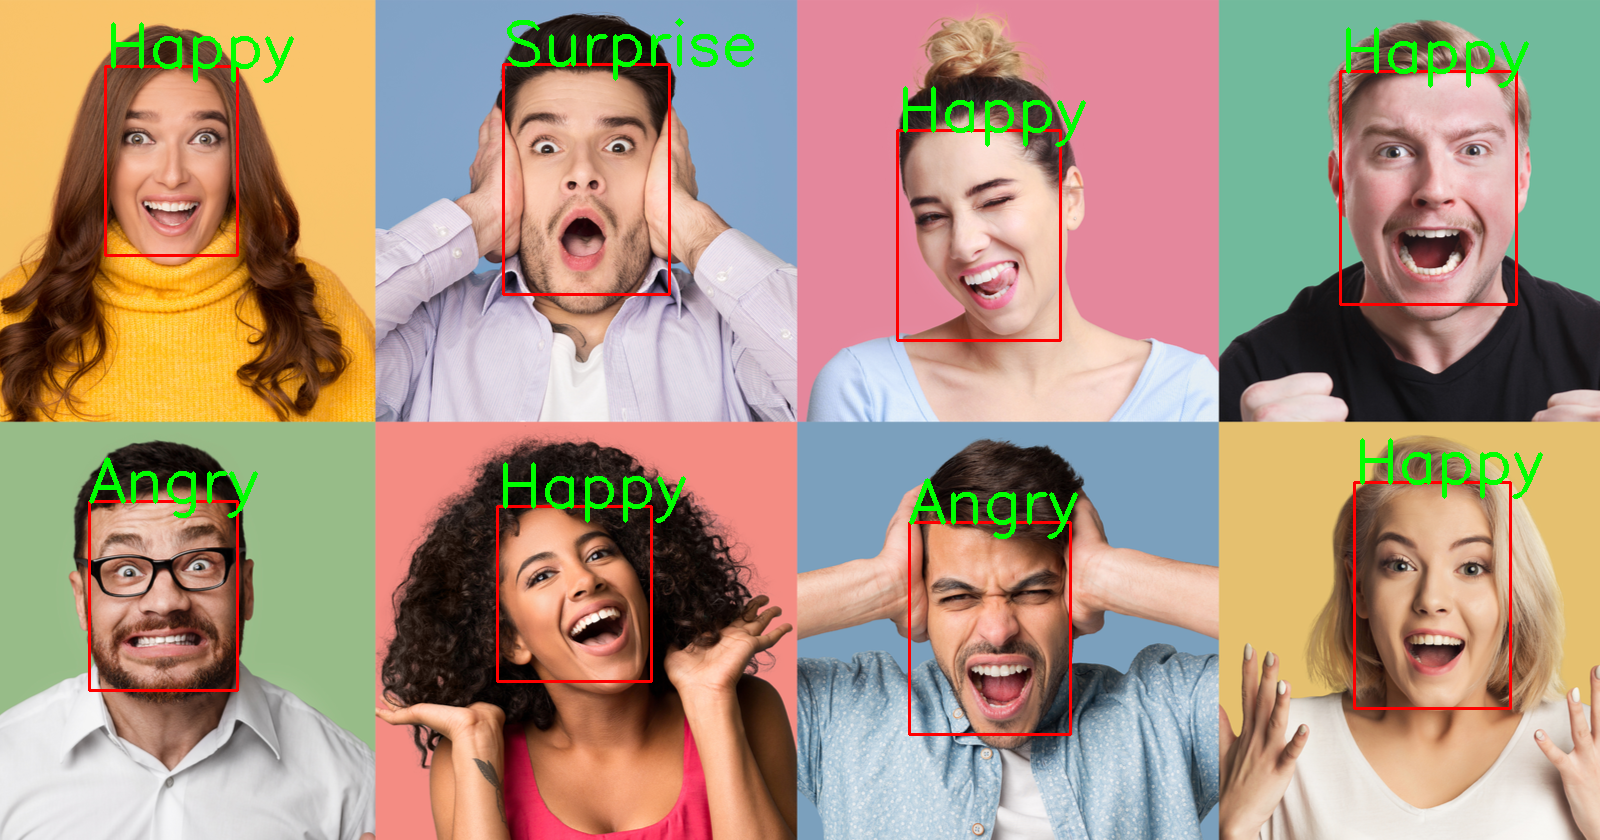

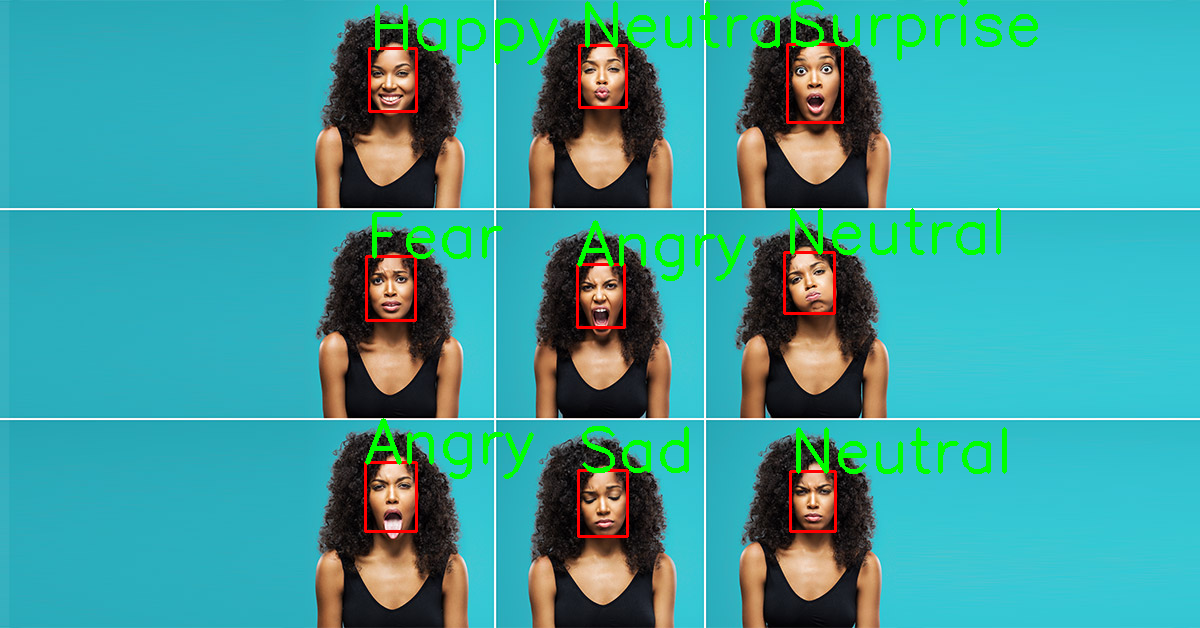

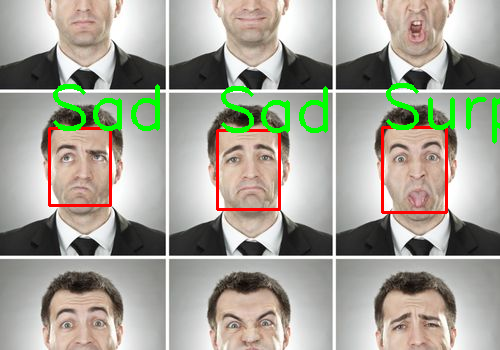

In [ ]:
get_emotion("/content/1.png")
get_emotion("/content/2.jpg")
get_emotion("/content/3.jpg")

In [ ]:
training_set = train_datagen.flow_from_directory(train_dir,batch_size=128,target_size=(96,96),shuffle=True,class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_dir,batch_size=128,target_size=(96,96),shuffle=True,class_mode='categorical')

valid_dataset = valid_datagen.flow_from_directory(train_dir,target_size = (96,96),class_mode = 'categorical',subset = 'validation',batch_size = 128)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [34]:
model1 = tf.keras.applications.MobileNetV2(input_shape=(96,96,3))

14540800/14536120 [==============================] - 0s 0us/step


In [35]:
base_input = model1.layers[0].input
base_output = model1.layers[-2].output
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output =layers.Dense(7,activation='softmax')(final_output)

In [36]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

learning_rate = 0.001
adam_optimizer = optimizers.Adam(lr = learning_rate)
epochs = 50
new_model.compile(optimizer = adam_optimizer, metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [ ]:
learningRate_reducer = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.8)
earlyStopping = EarlyStopping(monitor='val_acc', patience=6)
checkpointer = ModelCheckpoint('/content/gdrive/MyDrive/Project/Dataset/weights2.hd5', monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
new_model.fit(
          training_set,
          epochs = epochs,
          validation_data = valid_dataset,
          callbacks=[learningRate_reducer, checkpointer, earlyStopping]
          )

Epoch 1/50
225/225 [==============================] - 102s 431ms/step - loss: 1.4838 - accuracy: 0.4277 - val_loss: 2.5640 - val_accuracy: 0.4177

Epoch 00001: val_loss improved from inf to 2.56402, saving model to /content/gdrive/MyDrive/Project/Dataset/weights2.hd5
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Project/Dataset/weights2.hd5/assets
Epoch 2/50
225/225 [==============================] - 96s 424ms/step - loss: 1.1252 - accuracy: 0.5773 - val_loss: 2.2011 - val_accuracy: 0.4107

Epoch 00002: val_loss improved from 2.56402 to 2.20109, saving model to /content/gdrive/MyDrive/Project/Dataset/weights2.hd5
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Project/Dataset/weights2.hd5/assets
Epoch 3/50
225/225 [==============================] - 96s 424ms/step - loss: 1.0386 - accuracy: 0.6091 - val_loss: 2.1209 - val_accuracy: 0.4731

Epoch 00003: val_loss improved from 2.20109 to 2.12087, saving model to /content/gdrive/MyDrive/Project/Dataset/weights2.hd5


In [30]:
modelJson = new_model.to_json()
with open("/content/gdrive/MyDrive/Project/Dataset/FERmodel2.json", "w") as json_file:
    json_file.write(modelJson)
# serialize weights to HDF5
new_model.save_weights("/content/gdrive/MyDrive/Project/Dataset/FERmodel2.h5")
print("Saved model to the drive")

Saved model to the drive


In [38]:
new_model1 = new_model

In [39]:
from keras.models import model_from_json
new_model1.load_weights("/content/gdrive/MyDrive/Project/Dataset/FERmodel2.h5")
print("Loaded the model from drive")

Loaded the model from drive


In [ ]:
predicted_test_labels = np.argmax(new_model.predict(valid_dataset), axis=1)
print ("Accuracy score = ", accuracy_score(predicted_test_labels,valid_dataset.classes))

Accuracy score =  0.16739244034140394


In [ ]:
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
from google.colab.patches import cv2_imshow

def get_emotion(imgLocation):
    MTCNNDetector = MTCNN()
    img = cv2.imread(imgLocation)
    gray = img
    emotionLabels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

    faces = MTCNNDetector.detect_faces(img)
    for f in faces:
        x, y, w, h = f['box']
        x1, y1 = x + w, y + h
        cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(96,96),interpolation=cv2.INTER_AREA)
        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)
        # make a prediction on the ROI, then lookup the class
            preds = new_model.predict(roi)[0]
            label=emotionLabels[preds.argmax()]
            label_position = (x,y)
            cv2.putText(img,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        else:
            cv2.putText(img,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    cv2_imshow(img)

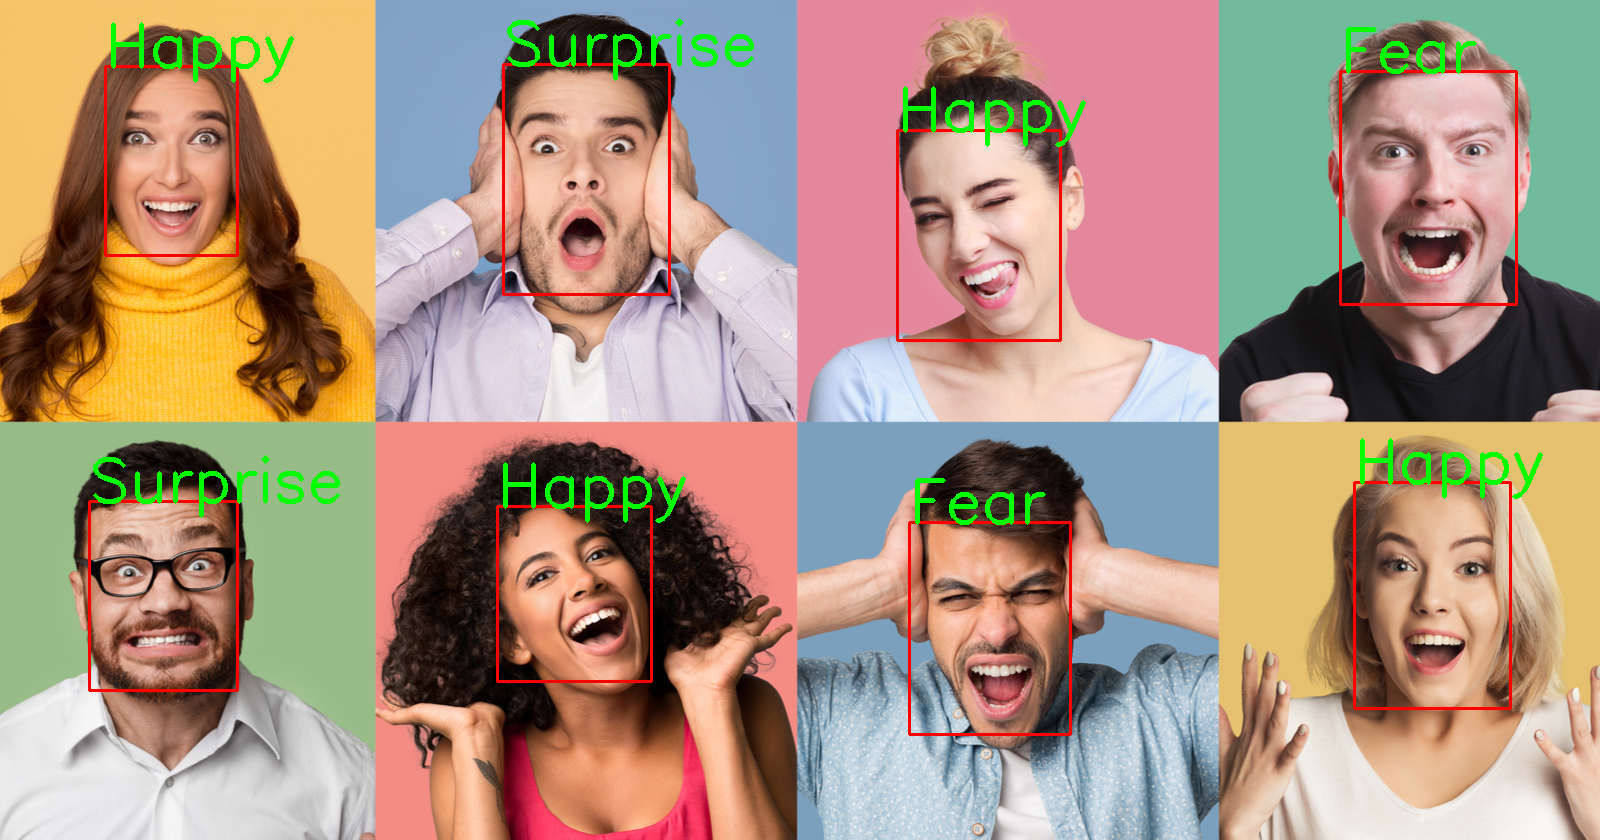

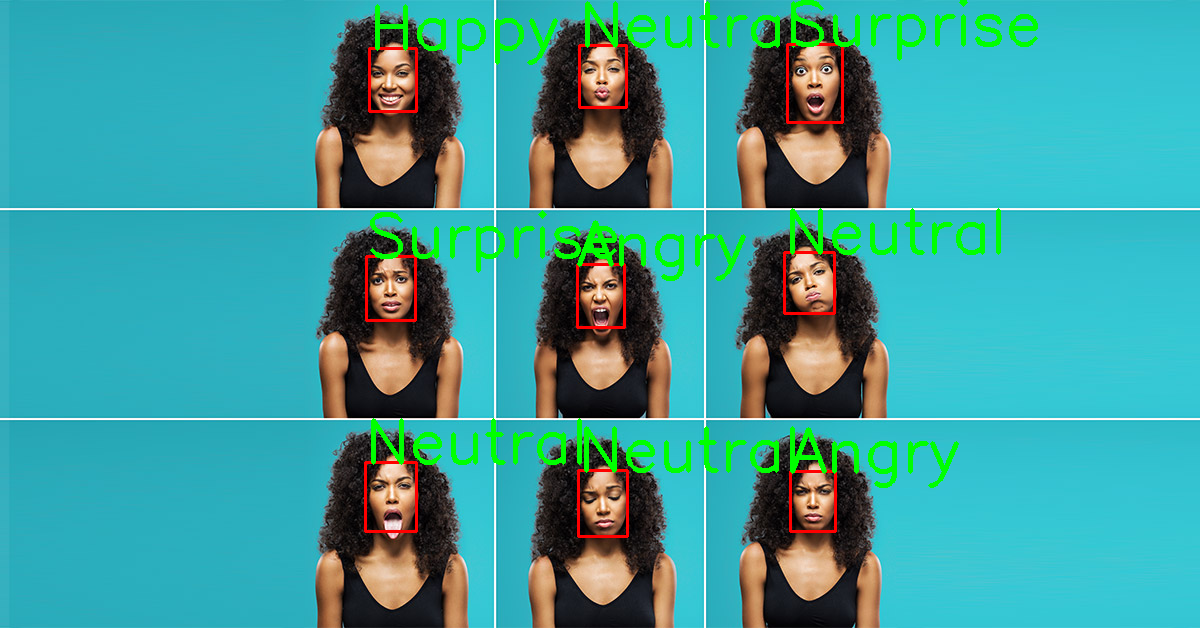

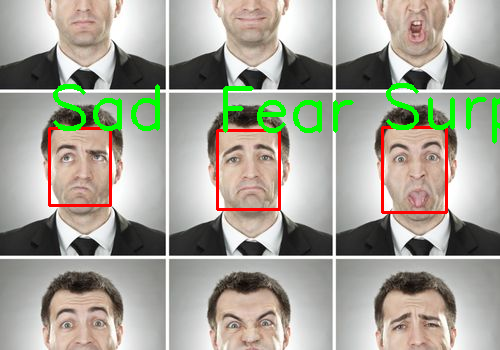

In [ ]:
get_emotion("/content/1.png")
get_emotion("/content/2.jpg")
get_emotion("/content/3.jpg")

In [ ]:
new_model1.fit(training_set,epochs = 1,validation_data = test_set,
          callbacks=[lr_reducer, early_stopper]
          )

225/225 [==============================] - 96s 428ms/step - loss: 0.1556 - accuracy: 0.9442 - val_loss: 1.8548 - val_accuracy: 0.6638


In [ ]:
model1.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 48, 48, 32)   0           bn_Conv1[0][0]                   
________________________________________________________________________________